In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

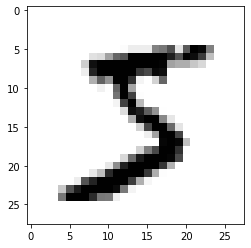

Train label: 5


In [4]:
# Let's look at a single observation
digit = x_train[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[0])

In [5]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [10]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 8s 19ms/step - loss: 0.3616 - accuracy: 0.8914 - val_loss: 0.0833 - val_accuracy: 0.9782
Epoch 2/3
422/422 [==============================] - 9s 20ms/step - loss: 0.1101 - accuracy: 0.9655 - val_loss: 0.0626 - val_accuracy: 0.9817
Epoch 3/3
422/422 [==============================] - 10s 23ms/step - loss: 0.0834 - accuracy: 0.9739 - val_loss: 0.0507 - val_accuracy: 0.9853


In [11]:
# Evaluate the model on training data
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", loss)
print("Test accuracy:", accuracy)

Train loss: 0.051129043102264404
Test accuracy: 0.9847833514213562


In [12]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.046512700617313385
Test accuracy: 0.9848999977111816
